
### data.lacity.org API

In [1]:
#pip install sodapy
#pip install rise

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import datetime
import dateutil
import calendar

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

from sodapy import Socrata
from config import password, username


In [4]:
#hold cell for tokenized requests
    #unauthenticated client only works with public data sets. Note 'None'
        #in place of application token, and no username or password:
        #client = Socrata("data.lacity.org", None)

#authenticated client request (needed for non-public datasets):
client = Socrata("data.lacity.org",
    app_token="hdI22XaCHRYX4ZbAtX4tMtBMi",
    username=username,
    password=password)

#first 100,000 results, returned as JSON from API / converted to Python list of
#dictionaries by sodapy
results = client.get("63jg-8b9z", limit=100000)

#convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df.head()

,area,area_name,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,crm_cd_desc,cross_street,date_occ,...,premis_desc,rpt_dist_no,status,status_desc,time_occ,vict_age,vict_descent,vict_sex,weapon_desc,weapon_used_cd
0,13,Newton,900,900,NaN,NaN,NaN,VIOLATION OF COURT ORDER,NaN,2010-02-20T00:00:00.000,...,SINGLE FAMILY DWELLING,1385,AA,Adult Arrest,1350,48,H,M,NaN,NaN
1,14,Pacific,740,740,NaN,NaN,NaN,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",MANCHESTER AV,2010-09-12T00:00:00.000,...,STREET,1485,IC,Invest Cont,0045,0,W,M,NaN,NaN
2,13,Newton,946,946,NaN,NaN,NaN,OTHER MISCELLANEOUS CRIME,NaN,2010-08-09T00:00:00.000,...,ALLEY,1324,IC,Invest Cont,1515,0,H,M,NaN,NaN
3,06,Hollywood,900,900,998,NaN,NaN,VIOLATION OF COURT ORDER,HOLLYWOOD BL,2010-01-05T00:00:00.000,...,STREET,0646,IC,Invest Cont,0150,47,W,F,HAND GUN,102
4,01,Central,122,122,NaN,NaN,NaN,"RAPE, ATTEMPTED",SAN PEDRO ST,2010-01-02T00:00:00.000,...,ALLEY,0176,IC,Invest Cont,2100,47,H,F,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400


In [5]:
#select only required fields for analysis
subset_df = results_df.loc[:,('area', 'area_name', 'crm_cd', 'crm_cd_desc', 'date_occ', 'date_rptd', 'dr_no', 'lat', 'lon', 'location', 'mocodes', 'premis_cd', 'rpt_dist_no', 'time_occ')]
subset_df.head()
#subset_df.info()
#subset_df.shape

,area,area_name,crm_cd,crm_cd_desc,date_occ,date_rptd,dr_no,lat,lon,location,mocodes,premis_cd,rpt_dist_no,time_occ
0,13,Newton,900,VIOLATION OF COURT ORDER,2010-02-20T00:00:00.000,2010-02-20T00:00:00.000,001307355,33.9825,-118.2695,300 E GAGE AV,0913 1814 2000,501,1385,1350
1,14,Pacific,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",2010-09-12T00:00:00.000,2010-09-13T00:00:00.000,011401303,33.9599,-118.3962,SEPULVEDA BL,0329,101,1485,0045
2,13,Newton,946,OTHER MISCELLANEOUS CRIME,2010-08-09T00:00:00.000,2010-08-09T00:00:00.000,070309629,34.0224,-118.2524,1300 E 21ST ST,0344,103,1324,1515
3,06,Hollywood,900,VIOLATION OF COURT ORDER,2010-01-05T00:00:00.000,2010-01-05T00:00:00.000,090631215,34.1016,-118.3295,CAHUENGA BL,1100 0400 1402,101,0646,0150
4,01,Central,122,"RAPE, ATTEMPTED",2010-01-02T00:00:00.000,2010-01-03T00:00:00.000,100100501,34.0387,-118.2488,8TH ST,0400,103,0176,2100


In [6]:
#rename columns
subset_df.rename(
  columns={
    #0 : 'title',
    #1 : 'author'
    'area': 'Area ID', 
    'area_name': 'Area Name',
    'crm_cd': 'Crime Code',
    'crm_cd_desc': 'Crime Code Description',
    'date_occ': 'Date Occurred',
    'date_rptd': 'Date Reported',
    'dr_no': 'DR #',
    'lat': 'Latitude',
    'lon': 'Longitude',
    'location': 'Location',
    'mocodes': 'MO Code',
    'premis_cd': 'Premise Code',
    'rpt_dist_no': 'Reporting District',
    'time_occ': 'Time Occurred'
  },
  inplace=True
)
subset_df

,Area ID,Area Name,Crime Code,Crime Code Description,Date Occurred,Date Reported,DR #,Latitude,Longitude,Location,MO Code,Premise Code,Reporting District,Time Occurred
0,13,Newton,900,VIOLATION OF COURT ORDER,2010-02-20T00:00:00.000,2010-02-20T00:00:00.000,001307355,33.9825,-118.2695,300 E GAGE AV,0913 1814 2000,501,1385,1350
1,14,Pacific,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",2010-09-12T00:00:00.000,2010-09-13T00:00:00.000,011401303,33.9599,-118.3962,SEPULVEDA BL,0329,101,1485,0045
2,13,Newton,946,OTHER MISCELLANEOUS CRIME,2010-08-09T00:00:00.000,2010-08-09T00:00:00.000,070309629,34.0224,-118.2524,1300 E 21ST ST,0344,103,1324,1515
3,06,Hollywood,900,VIOLATION OF COURT ORDER,2010-01-05T00:00:00.000,2010-01-05T00:00:00.000,090631215,34.1016,-118.3295,CAHUENGA BL,1100 0400 1402,101,0646,0150
4,01,Central,122,"RAPE, ATTEMPTED",2010-01-02T00:00:00.000,2010-01-03T00:00:00.000,100100501,34.0387,-118.2488,8TH ST,0400,103,0176,2100
5,01,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),2010-01-04T00:00:00.000,2010-01-05T00:00:00.000,100100506,34.0480,-118.2577,700 W 7TH ST,0344 1402,404,0162,1650
6,01,Central,330,BURGLARY FROM VEHICLE,2010-01-07T00:00:00.000,2010-01-08T00:00:00.000,100100508,34.0389,-118.2643,PICO BL,0344,101,0182,2005
7,01,Central,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2010-01-08T00:00:00.000,2010-01-09T00:00:00.000,100100509,34.0435,-118.2427,500 CROCKER ST,0416,710,0157,2100
8,01,Central,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2010-01-09T00:00:00.000,2010-01-09T00:00:00.000,100100510,34.0450,-118.2640,800 W OLYMPIC BL,0400 0416,108,0171,0230
9,01,Central,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",2010-01-06T00:00:00.000,2010-01-09T00:00:00.000,100100511,34.0538,-118.2488,200 S OLIVE ST,0344 1402,710,0132,2100


In [7]:
#select only Crime Code for Burglary, code 310 or "BURGLARY"
burglary_df = subset_df.loc[subset_df['Crime Code Description'] == 'BURGLARY']
burglary_df

,Area ID,Area Name,Crime Code,Crime Code Description,Date Occurred,Date Reported,DR #,Latitude,Longitude,Location,MO Code,Premise Code,Reporting District,Time Occurred
49,01,Central,310,BURGLARY,2010-02-25T00:00:00.000,2010-02-25T00:00:00.000,100100650,34.0617,-118.2469,500 N FIGUEROA ST,0344 1251,502,0111,0030
87,01,Central,310,BURGLARY,2010-03-23T00:00:00.000,2010-03-25T00:00:00.000,100100743,34.0320,-118.2667,200 W WASHINGTON BL,0344,203,0192,0125
149,01,Central,310,BURGLARY,2010-05-05T00:00:00.000,2010-05-05T00:00:00.000,100100879,34.0416,-118.2620,1100 S GRAND AV,0344,502,0182,1500
161,01,Central,310,BURGLARY,2010-05-10T00:00:00.000,2010-05-10T00:00:00.000,100100900,34.0673,-118.2354,400 COTTAGE HOME ST,0321 0344 1202 1402,501,0105,1105
202,01,Central,310,BURGLARY,2010-05-15T00:00:00.000,2010-06-05T00:00:00.000,100101000,34.0444,-118.2628,700 W OLYMPIC BL,0344 1606,502,0182,1000
203,01,Central,310,BURGLARY,2010-05-12T00:00:00.000,2010-06-05T00:00:00.000,100101001,34.0444,-118.2628,700 W OLYMPIC BL,0344 1606,502,0182,2100
217,01,Central,310,BURGLARY,2010-06-12T00:00:00.000,2010-06-13T00:00:00.000,100101035,34.0394,-118.2496,800 SAN JULIAN ST,0344 0358 1609,203,0176,2058
251,01,Central,310,BURGLARY,2010-06-28T00:00:00.000,2010-06-29T00:00:00.000,100101139,34.0482,-118.2472,400 S MAIN ST,0344 1606,502,0145,1000
314,01,Central,310,BURGLARY,2010-08-06T00:00:00.000,2010-08-07T00:00:00.000,100101319,34.0413,-118.2517,300 E 8TH ST,0344 1307 1609,402,0176,1730
315,01,Central,310,BURGLARY,2010-08-06T00:00:00.000,2010-08-07T00:00:00.000,100101320,34.0413,-118.2517,300 E 8TH ST,0324,203,0176,1730


In [8]:
#cleanup date format
burglary_df["Date Occurred"] = pd.to_datetime(burglary_df["Date Occurred"])
burglary_df["Date Reported"] = pd.to_datetime(burglary_df["Date Reported"])
burglary_df.head()
#burglary_df.shape()


,Area ID,Area Name,Crime Code,Crime Code Description,Date Occurred,Date Reported,DR #,Latitude,Longitude,Location,MO Code,Premise Code,Reporting District,Time Occurred
49,01,Central,310,BURGLARY,2010-02-25,2010-02-25,100100650,34.0617,-118.2469,500 N FIGUEROA ST,0344 1251,502,0111,0030
87,01,Central,310,BURGLARY,2010-03-23,2010-03-25,100100743,34.0320,-118.2667,200 W WASHINGTON BL,0344,203,0192,0125
149,01,Central,310,BURGLARY,2010-05-05,2010-05-05,100100879,34.0416,-118.2620,1100 S GRAND AV,0344,502,0182,1500
161,01,Central,310,BURGLARY,2010-05-10,2010-05-10,100100900,34.0673,-118.2354,400 COTTAGE HOME ST,0321 0344 1202 1402,501,0105,1105
202,01,Central,310,BURGLARY,2010-05-15,2010-06-05,100101000,34.0444,-118.2628,700 W OLYMPIC BL,0344 1606,502,0182,1000


In [9]:
#copy dataframe for creating a working copy

month_df = burglary_df.copy()

In [10]:
#Hypothesis 1: the number of instances of burglary increase during the summer months
    #compare monthly count of burglaries
    #what does apply do?
        #take every item in test_df, apply the function in lambda and then create a series with the output

month_df["date_occurred_month"] = month_df["Date Occurred"].apply(lambda d: d.month)
month_df["date_occurred_month"].head()

49     2
87     3
149    5
161    5
202    5
Name: date_occurred_month, dtype: int64

In [11]:
#Hypothesis 1: append lambda list of months to main DF 

burglary_df["Occurrence Month"] = month_df["date_occurred_month"] 
burglary_df.head()

,Area ID,Area Name,Crime Code,Crime Code Description,Date Occurred,Date Reported,DR #,Latitude,Longitude,Location,MO Code,Premise Code,Reporting District,Time Occurred,Occurrence Month
49,01,Central,310,BURGLARY,2010-02-25,2010-02-25,100100650,34.0617,-118.2469,500 N FIGUEROA ST,0344 1251,502,0111,0030,2
87,01,Central,310,BURGLARY,2010-03-23,2010-03-25,100100743,34.0320,-118.2667,200 W WASHINGTON BL,0344,203,0192,0125,3
149,01,Central,310,BURGLARY,2010-05-05,2010-05-05,100100879,34.0416,-118.2620,1100 S GRAND AV,0344,502,0182,1500,5
161,01,Central,310,BURGLARY,2010-05-10,2010-05-10,100100900,34.0673,-118.2354,400 COTTAGE HOME ST,0321 0344 1202 1402,501,0105,1105,5
202,01,Central,310,BURGLARY,2010-05-15,2010-06-05,100101000,34.0444,-118.2628,700 W OLYMPIC BL,0344 1606,502,0182,1000,5


In [12]:
#Hypothesis 1: calculate the count of months

month_counts = burglary_df["Occurrence Month"].value_counts()
month_counts

1     704
10    647
12    622
7     596
11    595
2     593
8     577
3     575
5     575
9     568
4     564
6     524
Name: Occurrence Month, dtype: int64

In [13]:
#month_counts.reset_index(name='Counts', inplace=True)

month_counts = month_counts.reset_index(name='Counts')
month_counts

,index,Counts
0,1,704
1,10,647
2,12,622
3,7,596
4,11,595
5,2,593
6,8,577
7,3,575
8,5,575
9,9,568


In [14]:
#create a dataframe from a series

data_dict = {'Month' : month_counts["index"], 'Counts' : month_counts["Counts"]} 
month_counts_df = pd.DataFrame(data_dict) 
month_counts_df = month_counts_df.sort_values(by=['Month'], ascending=True)
month_counts_df["Month"] = month_counts_df["Month"].apply(lambda x: calendar.month_abbr[x])
month_counts_df

,Month,Counts
0,Jan,704
5,Feb,593
7,Mar,575
10,Apr,564
8,May,575
11,Jun,524
3,Jul,596
6,Aug,577
9,Sep,568
1,Oct,647


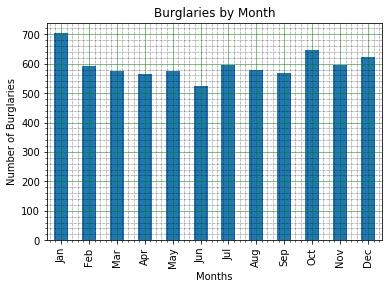

In [15]:
#Hypothesis 1: the number of instances of burglary increase during the summer season
    # create a bar chart of the "Burglaries by Month"

month_counts_df["Counts"].plot(kind='bar')

# turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# chart labels and a title
plt.title("Burglaries by Month")
plt.xlabel("Months")
plt.xticks(np.arange(12),labels=month_counts_df["Month"])
plt.ylabel("Number of Burglaries")

plt.savefig('../resources/images/hypothesis_1_bar-chart.jpg')
plt.show()

In [16]:
jun_jul_aug_df = month_counts_df[month_counts_df["Month"].isin(["Jun", "Jul", "Aug"])]
jun_jul_aug_df

,Month,Counts
11,Jun,524
3,Jul,596
6,Aug,577


In [17]:
#Hypothesis 1: the number of instances of burglary increase during the summer months
    #Null Hypothesis: there is no relationship between the season and the number of instances of burglary each month 
    #t-tests
        #t-tests allow you to compare your sample mean to the population mean

#create report of statistic variance for months of June, July, August
#select rows June, July, August
sample = jun_jul_aug_df["Counts"]

#run t-test for sample months June, July, August
(t_stat, p) = stats.ttest_1samp(sample, month_counts_df.mean())
print("t-statistics is {}.".format(t_stat))
print("p-value is {}.".format(p))

t-statistics is Counts   -1.361603
dtype: float64.
p-value is [0.30641976].


In [18]:
#since the p-value in the t-test is greater than 5% (30.6%),
    #the null-hypothsis is true and our hypothesis,
    #the number of instances of burglary increase during the summer months, is false

No handles with labels found to put in legend.


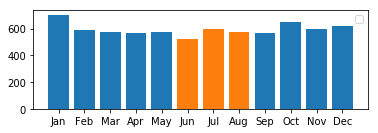

In [19]:
#WIP
#bar plot of data
plt.subplot(2, 1, 2)
plt.bar(x=month_counts_df["Month"],height=month_counts_df["Counts"])
plt.bar(x=jun_jul_aug_df["Month"],height=jun_jul_aug_df["Counts"])
# plt.plot(type="bar")
# plt.hist(month_counts["Counts"], 12, density=True, alpha=0.7, label="All Months")
# plt.hist(sample, 12, density=True, alpha=0.7, label="Summer Months")
# plt.axvline(month_counts["Counts"].mean(), color='k', linestyle='dashed', linewidth=1)
# plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 